In [1]:
pip freeze > visualisation_requirements.txt

Note: you may need to restart the kernel to use updated packages.


HOW DO YOU SMOTE FIRST WITHOUT THE Y?

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data_df = pd.read_csv("Project_data_csv")

In [4]:
data_df.shape

(270223, 31)

In [5]:
data_df.head()

,Unnamed: 0,batting_team,bowling_team,innings_num,over_col,ball_col,Match ID,Start Date,Runs,Running Total,...,Over and Balls Total,Remaining Team Value,Remaining Average Team Value,Start Team Value,DLS %,Tie Score,Ground RPO,Ground RPW,Batting Team Result DLS,DLS Correct?
0,0,Pakistan,Australia,2,20,1,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.6,103,4.79,29.31,Australia,Yes
1,1,Pakistan,Australia,2,20,2,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.8,103,4.79,29.31,Australia,Yes
2,2,Pakistan,Australia,2,20,3,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.9,104,4.79,29.31,Australia,Yes
3,3,Pakistan,Australia,2,20,4,1000887,2017-01-13,0,91,...,55,16,2.0,24,39.1,104,4.79,29.31,Australia,Yes
4,4,Pakistan,Australia,2,20,5,1000887,2017-01-13,1,92,...,55,16,2.0,24,39.3,105,4.79,29.31,Australia,Yes


In [6]:
data_df['DLS Correct?'].value_counts()

DLS Correct?
Yes    225310
No      44913
Name: count, dtype: int64

In [7]:
DLS_accuracy=225310/(225310+44913)

In [8]:
DLS_accuracy

0.833792830366031

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    270223 non-null  int64  
 1   batting_team                  270223 non-null  object 
 2   bowling_team                  270223 non-null  object 
 3   innings_num                   270223 non-null  int64  
 4   over_col                      270223 non-null  int64  
 5   ball_col                      270223 non-null  int64  
 6   Match ID                      270223 non-null  int64  
 7   Start Date                    270223 non-null  object 
 8   Runs                          270223 non-null  int64  
 9   Running Total                 270223 non-null  int64  
 10  Batter out                    270223 non-null  object 
 11  Wickets taken                 270223 non-null  int64  
 12  Start Team                    270223 non-nul

In [10]:
remaining_onb = []
for index, row in data_df.iterrows():
    onb = (row['Remaining Overs']*6) + row['Remaining Balls']
    remaining_onb.append(onb)
remaining_onb_df = pd.DataFrame(remaining_onb)

In [11]:
remaining_onb_df

,0
0,179
1,178
2,177
3,176
4,175
...,...
270218,18
270219,17
270220,16
270221,15


Below - creating a column for who wins - team 1 (team who bowled second), team 2(team who batted second) or a tie.  Can define these as bowling team and batting team respectively because I'm only using second innings data.

In [12]:
winner_no = []
for index, row in data_df.iterrows():
    #Team 2 wins
    if row['Winner'] == row['batting_team']:
        winner_no.append(3)
    #Team 1 wins
    elif row['Winner'] == row['bowling_team']:
        winner_no.append(1)
    #Tie
    else:
       winner_no.append(2)

In [13]:
winner_no_df = pd.DataFrame(winner_no)

In [14]:
winner_no_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       270223 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [15]:
winner_no_df.rename(columns={0: 'Winner_num'}, inplace=True)

Turning the Team 1 win, Team 2 win and tie numbers into 3 categories (1,2,3 respectively)

In [16]:
#winner_no_df['Winner_num'] = winner_no_df.Winner_num.astype('category')


In [17]:
data_df['Winner_num'] = winner_no_df['Winner_num']

In [18]:
data_df['Remaining overs and balls'] = remaining_onb_df[0]

In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    270223 non-null  int64  
 1   batting_team                  270223 non-null  object 
 2   bowling_team                  270223 non-null  object 
 3   innings_num                   270223 non-null  int64  
 4   over_col                      270223 non-null  int64  
 5   ball_col                      270223 non-null  int64  
 6   Match ID                      270223 non-null  int64  
 7   Start Date                    270223 non-null  object 
 8   Runs                          270223 non-null  int64  
 9   Running Total                 270223 non-null  int64  
 10  Batter out                    270223 non-null  object 
 11  Wickets taken                 270223 non-null  int64  
 12  Start Team                    270223 non-nul

Chose numerical values that feed into my hypothesis (wickets taken, team value, ground scores and remaining overs and balls feed into the prediction.)  Changed Winner into a numerical field for prediction as this will be the target variable.

In [20]:
data_df = data_df[['Unnamed: 0', 'Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Winner_num', 'Remaining overs and balls', 'Remainder']]

In [21]:
data_df.rename(columns={'Unnamed: 0': 'Row ID'}, inplace=True)

In [22]:
data_df

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,3,16,2.000,24,4.79,29.31,1,179,29.5
1,1,3,16,2.000,24,4.79,29.31,1,178,29.4
2,2,3,16,2.000,24,4.79,29.31,1,177,29.3
3,3,3,16,2.000,24,4.79,29.31,1,176,29.2
4,4,3,16,2.000,24,4.79,29.31,1,175,29.1
...,...,...,...,...,...,...,...,...,...,...
270218,270218,3,13,1.625,21,5.40,31.64,3,18,3.0
270219,270219,3,13,1.625,21,5.40,31.64,3,17,2.5
270220,270220,3,13,1.625,21,5.40,31.64,3,16,2.4
270221,270221,3,13,1.625,21,5.40,31.64,3,15,2.3


In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        270223 non-null  int64  
 1   Wickets taken                 270223 non-null  int64  
 2   Remaining Team Value          270223 non-null  int64  
 3   Remaining Average Team Value  270223 non-null  float64
 4   Start Team Value              270223 non-null  int64  
 5   Ground RPO                    270223 non-null  float64
 6   Ground RPW                    270223 non-null  float64
 7   Winner_num                    270223 non-null  int64  
 8   Remaining overs and balls     270223 non-null  int64  
 9   Remainder                     270223 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 20.6 MB


In [24]:
data_df.describe()

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
count,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000
mean,135111.000000,4.340881,12.531653,1.807368,24.059592,4.944435,30.351967,1.970769,104.967978,17.326729
std,78006.805233,2.190549,5.533073,0.332030,1.742394,0.353677,3.465019,0.993112,47.241142,7.871791
min,0.000000,0.000000,1.000000,1.000000,16.000000,3.980000,20.560000,1.000000,0.000000,0.000000
25%,67555.500000,3.000000,8.000000,1.600000,23.000000,4.720000,28.180000,1.000000,68.000000,11.200000
50%,135111.000000,4.000000,13.000000,1.857143,24.000000,4.850000,29.640000,1.000000,109.000000,18.100000
75%,202666.500000,6.000000,17.000000,2.000000,25.000000,5.090000,32.440000,3.000000,146.000000,24.200000
max,270222.000000,10.000000,29.000000,3.000000,30.000000,6.910000,53.080000,3.000000,180.000000,30.000000


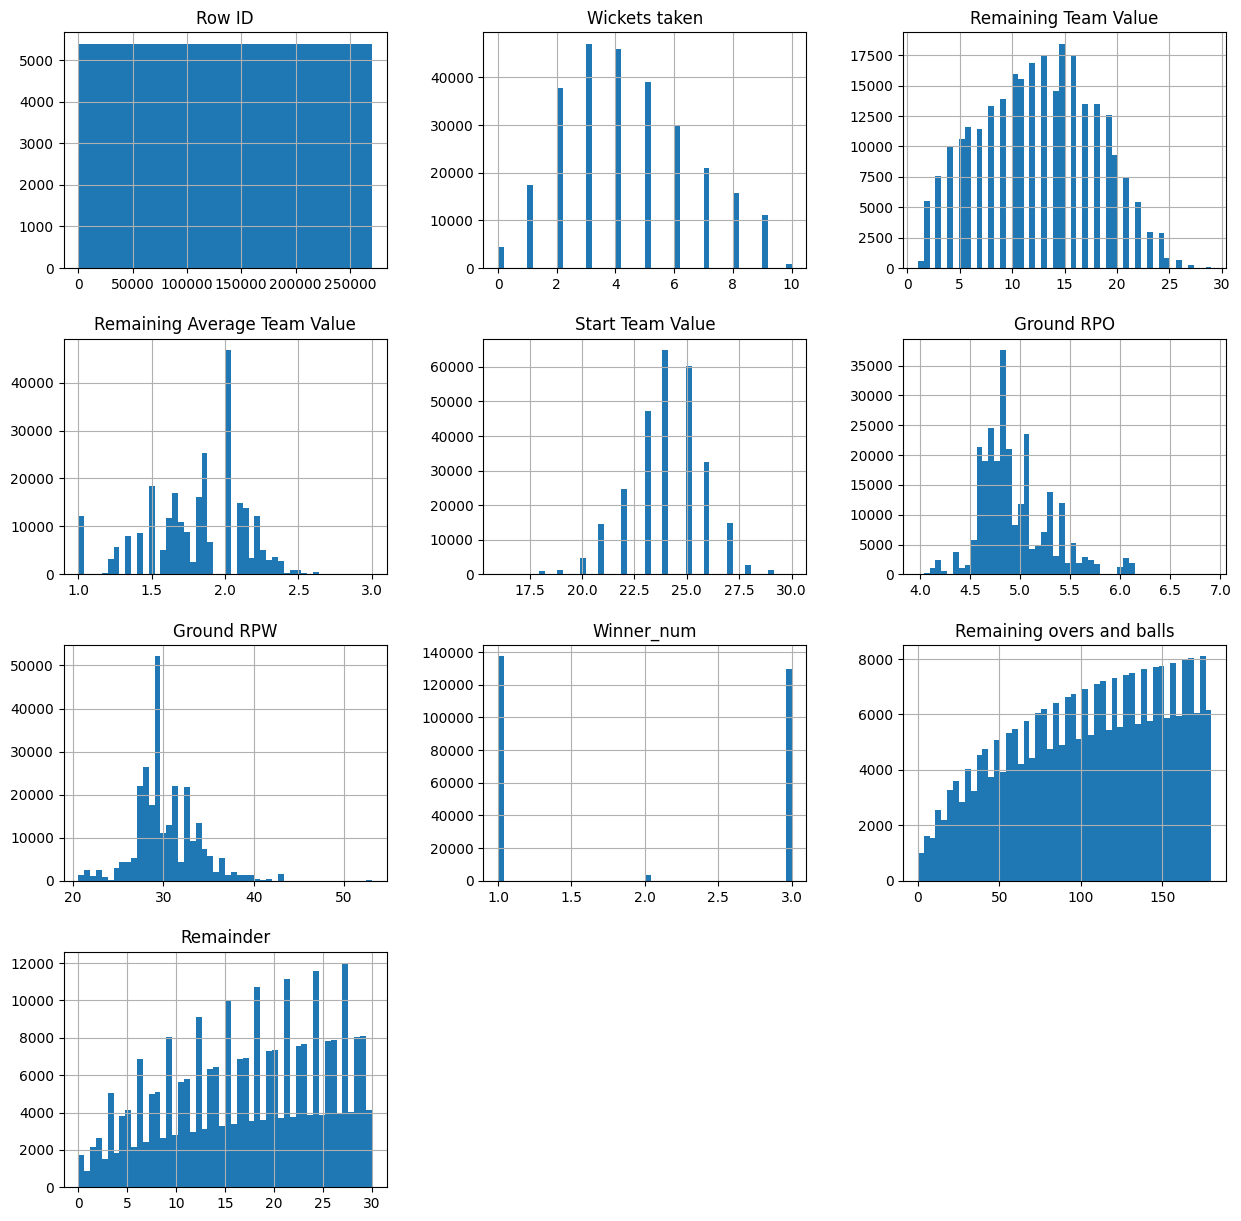

In [25]:
data_df.hist(bins=50, figsize=(15, 15))
plt.show()

Comments: Different scales, normal distribution of team value, slightly skewed of ground rpo and rpw.  Remainder funny - should I do it in balls rather than remainder?  Might make more sense.

Wickets taken and team value seem to follow Gaussian distribution and have low standard deviation (2.19 and 2.53 respectively)
Turned remaining overs and balls into remainder number and std much lower for that(7.87 compared to 47.24)

The other attributes have low standard deviation too but ground rpo, ground rpw and 

In [26]:
data_df['Winner_num'].value_counts()

Winner_num
1    137321
3    129422
2      3480
Name: count, dtype: int64

In [27]:
data_df.shape

(270223, 10)

In [ ]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
train_set, test_set = split_data_with_id_hash(data_df, 0.2, "Row ID")

In [ ]:
train_set.shape

test_set.shape

In [ ]:
data_train = data_train.reset_index(drop=True)
data_train = train_set.copy()
data_train.to_csv("data_train_csv")

In [ ]:
data_test = data_test.reset_index(drop=True)
data_test = test_set.copy()
data_test.to_csv("data_test_csv")

In [ ]:
data_train

In [ ]:
data_test

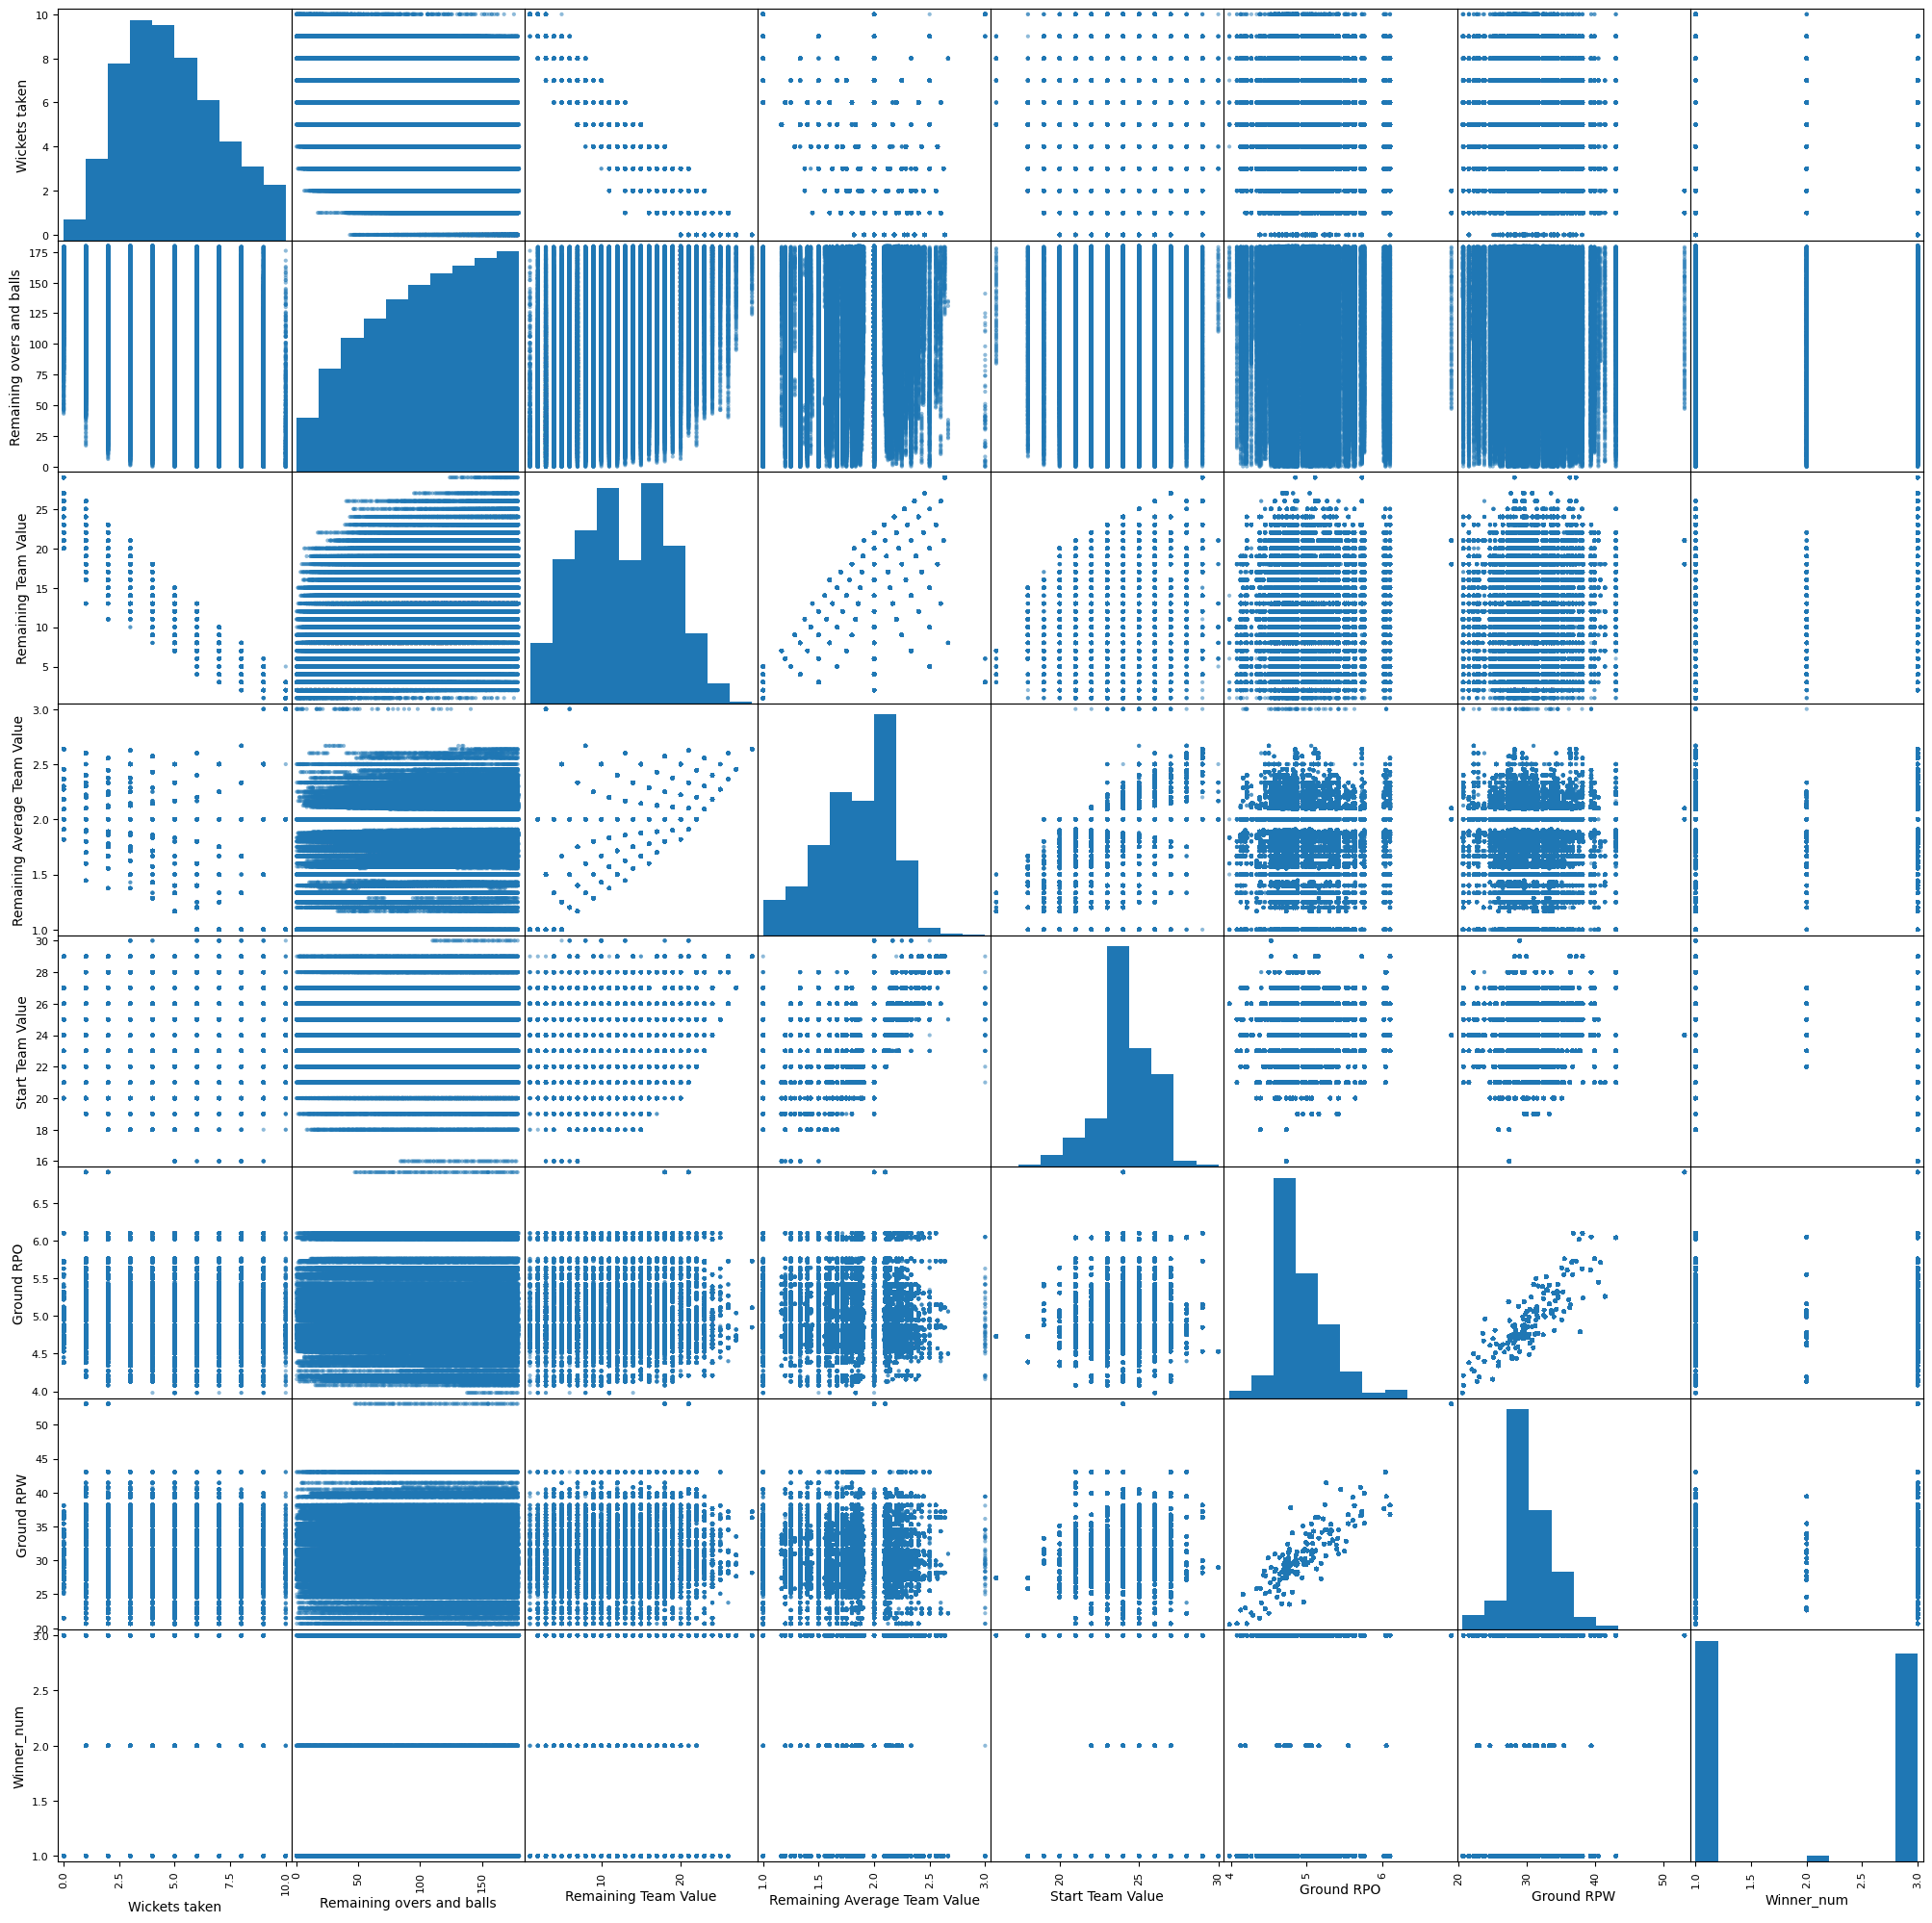

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["Wickets taken", "Remaining overs and balls", "Remaining Team Value", "Remaining Average Team Value", "Start Team Value", "Ground RPO", "Ground RPW", "Winner_num"]
scatter_matrix(data_train[attributes], figsize=(25, 25))
plt.show()

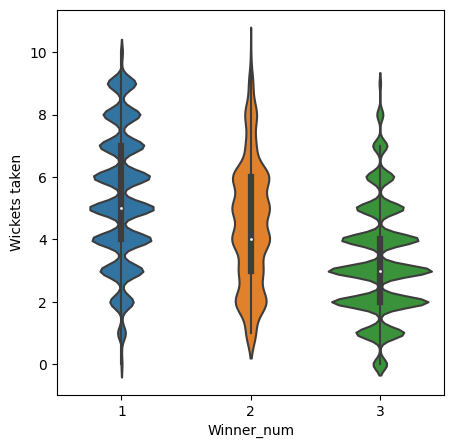

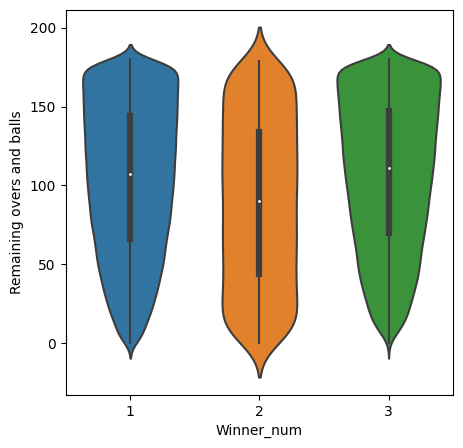

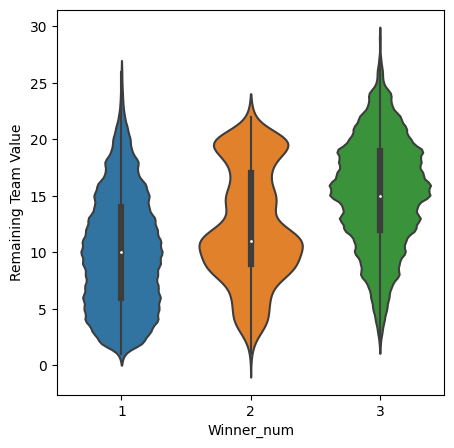

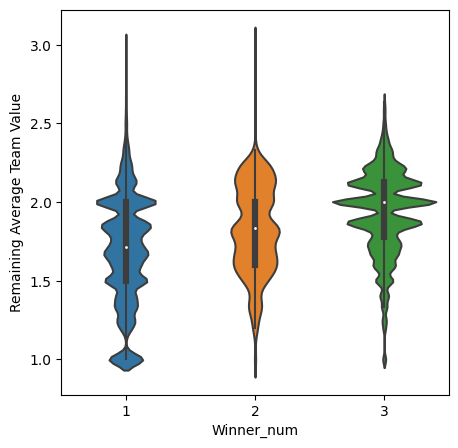

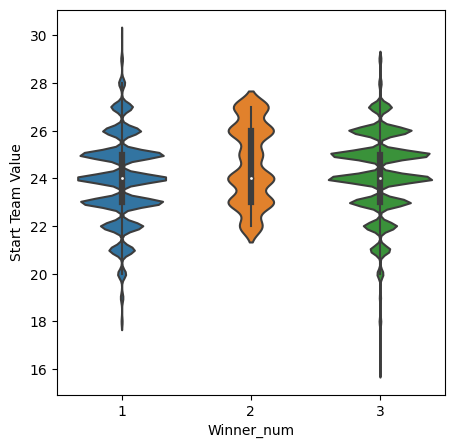

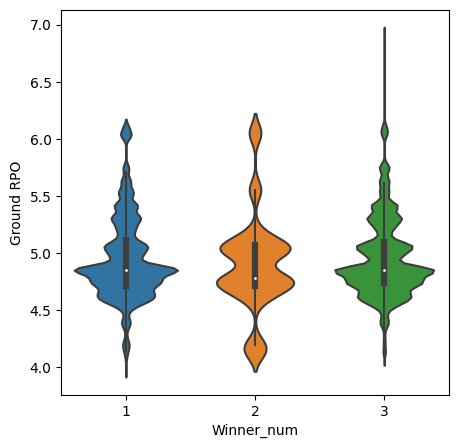

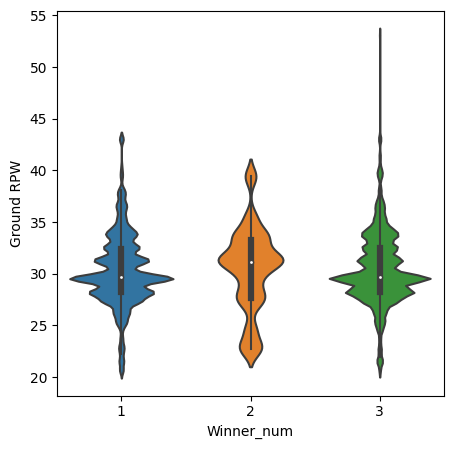

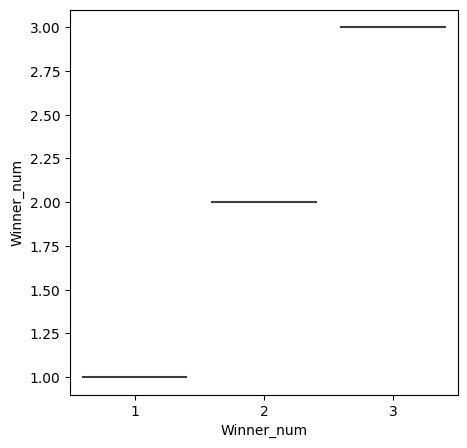

In [37]:
for a in attributes:
    plt.figure(figsize = (5, 5))
    sns.violinplot(x='Winner_num',y=a,data=data_train)

From the boxplots you can see some near separation between wickets taken and whether team 1 or team 2 win, but a mixture for tie.

For Team Value you also see some separation between team 1 and team 2, though more overlap than for the boxplots.  Again, tie for mixture.

Aside from some outliers, Ground RPO, Ground RPW and remaining overs and balls don't seem to predict whether team 1 or team 2 wins.

In [38]:
corr_matrix = data_train.corr(method = 'pearson')

In [39]:
corr_matrix
corr_matrix['Winner_num']

Wickets taken                  -0.468700
Remaining Team Value            0.470823
Remaining Average Team Value    0.375050
Start Team Value                0.082391
Ground RPO                      0.010607
Ground RPW                      0.024636
Winner_num                      1.000000
Remaining overs and balls       0.031662
Remainder                       0.031661
Name: Winner_num, dtype: float64

<Axes: >

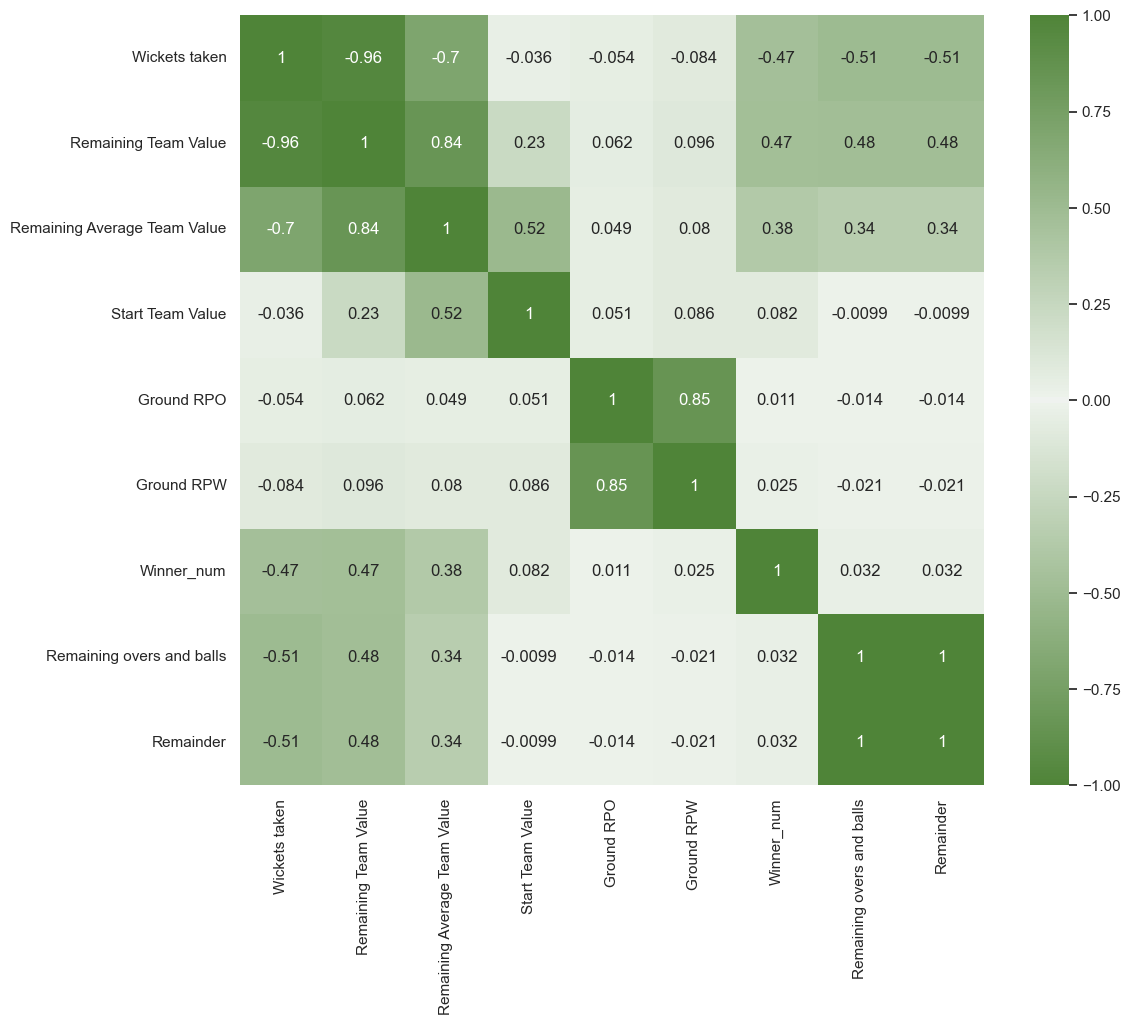

In [40]:
sns.set(rc={'figure.figsize':(12,10)})
new_cmap = sns.diverging_palette(120, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=new_cmap, vmin=-1, vmax=1)

In [41]:
skew = data_train.skew(axis='rows')
print(skew)

Wickets taken                   0.334836
Remaining Team Value            0.026673
Remaining Average Team Value   -0.522541
Start Team Value               -0.287459
Ground RPO                      0.958401
Ground RPW                      0.558402
Winner_num                      0.058455
Remaining overs and balls      -0.270833
Remainder                      -0.271601
dtype: float64


#Commentary on correlation

Best correlation with winner are wickets taken and team value.  Unsurprisingly there's strong correlation between ground RPO and RPW.  Strong correlation betwen team value and wickets taken, which also makes sense as the more wickets taken the lower the team value.  Should I really be looking at the higher team value to start with rather than continuing team value?  Probably a better predictor but also again is that unfair?  Will run the code again and check.

Pearson or 

Data Commentary in general

Number of rows, balance of the category, skew, separability for the boxplots.

Upsampling/ oversampling to sort out imbalance

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/


Scaling first

In [42]:
X_train = data_train.drop('Winner_num', axis=1)
X_test = data_test.drop('Winner_num', axis=1)
y_train = data_train['Winner_num']
y_test = data_test['Winner_num']

In [53]:
from sklearn.preprocessing import MinMaxScaler

def norm(trainx, testx, trainy, testy):
    
    #MinMaxScaler - Normalisation is rescaling the data so that all values are within the range of 0 and 1
    X_scaler = MinMaxScaler(feature_range=(0,1))
    X_scaler.fit(trainx)
    trainx_norm = X_scaler.transform(trainx)
    testx_norm = X_scaler.transform(testx)

    #reshape 1d arrays to 2d
    trainy = trainy.to_numpy()
    testy = testy.to_numpy()
    trainy = trainy.reshape(len(trainy), 1)
    testy= testy.reshape(len(testy), 1)

    y_scaler = MinMaxScaler(feature_range=(0,1))

    y_scaler.fit(trainy)
    trainy_norm = y_scaler.transform(trainy)
    testy_norm = y_scaler.transform(testy)

    trainx_norm = pd.DataFrame(trainx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder'])
    testx_norm = pd.DataFrame(testx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder'])
                              
    trainy_norm = pd.DataFrame(trainy_norm, columns=['Winner_num'])
    testy_norm = pd.DataFrame(testy_norm, columns=['Winner_num'])
    
    return(trainx_norm, testx_norm, trainy_norm, testy_norm)

Data Standardisation

In [67]:
from sklearn.preprocessing import StandardScaler
def stan(trainx, testx):
    scaler = StandardScaler()
    scaler.fit(trainx)
    trainx_stan = scaler.transform(trainx)
    testx_stan = scaler.transform(testx)

    trainx_stan = pd.DataFrame(trainx_stan, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder'])
    testx_stan = pd.DataFrame(testx_stan, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder'])
    return (trainx_stan, testx_stan)

scale options are n, s, b.  Stands for Norm, Stan, or Both

In [72]:
def scaling(trainx, testx, trainy, testy, scale):
    if scale == 'n':
        trainx_scale, testx_scale, trainy_scale, testy_scale = norm(trainx, testx, trainy, testy)
    elif scale == 's':
        trainx_scale, testx_scale = stan(trainx, testx)
        trainy_scale = trainy
        testy_scale = testy
        
    elif scale == 'b':
        trainx_scale, testx_scale, trainy_scale, testy_scale = norm(trainx, testx, trainy, testy)
        trainx_scale, testx_scale = stan(trainx_scale, testx_scale)
    return (trainx_scale, testx_scale, trainy_scale, testy_scale)    

In [63]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = scaling(X_train, X_test, y_train, y_test, 'n')

In [69]:
X_train_stan, X_test_stan, y_train_stan, y_test_stan =scaling(X_train, X_test, y_train, y_test, 's')

In [73]:
X_train_norm_stan, X_test_norm_stan, y_train_norm_stan, y_test_norm_stan = scaling(X_train, X_test, y_train, y_test, 'b')

In [75]:
X_train_norm_stan

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remaining overs and balls,Remainder
0,-0.612403,0.627209,0.580756,-0.033767,-0.436676,-0.300612,1.568027,1.547371
1,-0.612403,0.627209,0.580756,-0.033767,-0.436676,-0.300612,1.546859,1.534668
2,-0.612403,0.627209,0.580756,-0.033767,-0.436676,-0.300612,1.504522,1.509260
3,-0.612403,0.627209,0.580756,-0.033767,-0.436676,-0.300612,1.483354,1.496556
4,-0.612403,0.627209,0.580756,-0.033767,-0.436676,-0.300612,1.441018,1.420334
...,...,...,...,...,...,...,...,...
216173,-0.612403,0.085135,-0.548683,-1.756044,1.288542,0.371908,-1.797722,-1.793711
216174,-0.612403,0.085135,-0.548683,-1.756044,1.288542,0.371908,-1.840058,-1.819119
216175,-0.612403,0.085135,-0.548683,-1.756044,1.288542,0.371908,-1.861227,-1.882637
216176,-0.612403,0.085135,-0.548683,-1.756044,1.288542,0.371908,-1.882395,-1.895341


In [ ]:
sadfsdf

In [77]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [79]:
#https://arxiv.org/abs/1106.1813

from imblearn.over_sampling import SMOTE

def imbalance(trainx, trainy, strategy):
    if strategy == 'auto':
        smote = SMOTE(sampling_strategy='auto', random_state=7)

    elif strategy == 'minority':
        smote = SMOTE(sampling_strategy='minority', random_state=7)
    trainx_smote, trainy_smote = smote.fit_resample(X_train, y_train)
    return(trainx_smote, trainy_smote)
    

In [81]:
X_train_smote_min, y_train_smote_min = imbalance(X_train, y_train, 'minority')

In [83]:
#Class distribution before SMOTE
data_df['Winner_num'].value_counts()

Winner_num
1    137321
3    129422
2      3480
Name: count, dtype: int64

In [86]:
y_train_smote_min.value_counts()

Winner_num
1    109858
2    109858
3    103542
Name: count, dtype: int64

In [ ]:
y_train_resampled_min.shape

In [ ]:
X_train_resampled_auto.shape

In [ ]:
y_train_resampled_auto = pd.DataFrame(y_train_resampled_auto)
y_train_resampled_auto.set_axis(['Winner_num'], axis='columns')

y_train_resampled_min = pd.DataFrame(y_train_resampled_min)
y_train_resampled_min.set_axis(['Winner_num'], axis='columns')

In [ ]:
data_train_SMOTEauto = X_train_resampled_auto.copy()
data_train_SMOTEauto['Winner_num'] = y_train_resampled_auto

In [ ]:
data_train_SMOTEmin = X_train_resampled_min.copy()
data_train_SMOTEmin['Winner_num'] = y_train_resampled_min

In [ ]:
data_train_SMOTEmin.shape

In [ ]:
data_train_SMOTEauto.shape

In [ ]:
data_train_SMOTEauto.to_csv("data_train_SMOTEauto_csv")
data_train_SMOTEmin.to_csv("data_train_SMOTEmin_csv")

In [ ]:
data_train

In [ ]:
def corr(data, type):
    corr_matrix = data.corr(method = type)
    sns.set(rc={'figure.figsize':(12,10)})
    new_cmap = sns.diverging_palette(120, 120, as_cmap=True)
    sns.heatmap(corr_matrix, annot=True, cmap=new_cmap, vmin=-1, vmax=1)
    return corr_matrix

Want Options for:

SMOTE only
just norm
just standardised

norm, standardised
norm, standardised, SMOTE min
norm, standardised, SMOTE auto

In [ ]:
#Non smote
data_train_min_max_scaled_df = scaling(data_train_lognorm_df, MinMaxScaler)
data_train_standard_scaled_df = scaling(data_train_lognorm_df, StandardScaler)

#Smote min
data_train_min_max_scaled_SMOTEmin_df = scaling(data_train_lognorm_SMOTEmin_df, MinMaxScaler)
data_train_standard_scaled_SMOTEmin_df = scaling(data_train_lognorm_SMOTEmin_df, StandardScaler)

#Smote auto
data_train_min_max_scaled_SMOTEauto_df = scaling(data_train_lognorm_SMOTEauto_df, MinMaxScaler)
data_train_standard_scaled_SMOTEauto_df = scaling(data_train_lognorm_SMOTEauto_df, StandardScaler)

In [ ]:
data_train_min_max_scaled_df.to_csv("data_train_min_max_scaled_csv")
data_train_standard_scaled_df.to_csv("data_train_standard_scaled_csv")

data_train_min_max_scaled_SMOTEmin_df.to_csv("data_train_min_max_scaled_SMOTEmin_csv")
data_train_standard_scaled_SMOTEmin_df.to_csv("data_train_standard_scaled_SMOTEmin_csv")

data_train_min_max_scaled_SMOTEauto_df.to_csv("data_train_min_max_scaled_SMOTEauto_csv")
data_train_standard_scaled_SMOTEauto_df.to_csv("data_train_standard_scaled_SMOTEauto_csv")

data_test.to_csv("data_test_csv")

Experiment with Attribute combinations

Commentary

Shall I plot the Winner before I categorise?
Very imbalanced - 1 and 2 mainly fine but 0 not.

Be careful that any data added is to the end, given the row index is a unique iD.

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#:~:text=In%20a%20dataset%20with%20highly,obviously%20not%20the%20correct%20one.

Models

Random Forest
SVM
Neural Network

Questions:
Should I change the 0s to 3s or similar for Winner_num so that I don't have to add things to them to do the lognorm etc.